# Assignment 3


Visit https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330 for a detailed instruction of shortcuts for jupyter notebook. Google for other operating system.


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

## Preparation Steps

In [22]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [23]:
# ### Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


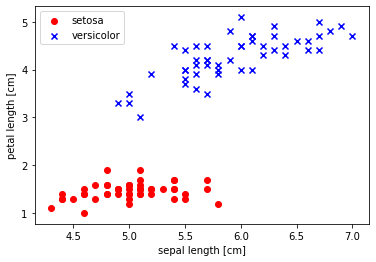

In [24]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

## Question 1. Exact Adaline Weights

In the class we discussed gradient descent for computing the weights of Adaline. It is possible however to use an 'exact' solver: Suppose $\tilde{X}$ is the data matrix, with shape $n\times d$, where $d$ is the number of attributes.  Now let's augment $\tilde{X}$ by adding one extra attribute/column on the left side of $X$ with all entries being equal to 1. Let $X$ be this new matrix (this step reflects that $x_0=1$). Also, let $w$ be the vector of weights (with shape $(d+1)\times 1$, and $y$ be the vector of labels (with shape $(n+1)\times 1$). It turns out that the optimal weight vector $w$ is given by 

$$
      w = (X^T X)^{-1} X^T y
$$

(i) Write a Python function *exactAdaline* (using numpy) that takes as input $\tilde{X}$ and $y$ and returns the optimal. weights $w$, following the above formula <br>
(ii) Apply the function on the iris dataset that you imported in an earlier cell. Report the weights calculated by the function. <br>
(iii) The total error for a vector $w$ is given by this formula

$$  err = || Xw - y||_2^2 $$

The subscript of the norm means the 2-norm. Use numpy to do your calculation. 

*(Please insert cells below for your answers. Clearly id the part of the question you answer)*

In [92]:
#(i):

#Defining a Python function exactAdaline that takes as input ~X 
#and y and returns the optimal weights w, following the above formula.
def exactAdaline(X,y):
    x = np.array(np.ones(100)) #define an x with all ones
    X_new = np.column_stack((x,X)) #add the new defined x as a column of all ones to the left of out matrix X
    X_trans = np.transpose(X_new)  #transpose of our new X
    m = np.matmul(X_trans,X_new)  #matrix multiplication
    inv = np.linalg.inv(m)  #finding the inverse
    t = np.matmul(inv, X_trans)  #multiply the inverse and transpose of X
    w = np.matmul(t,y)  #weights
    return w  #return the optimal weights, w

In [93]:
#(ii):

#Apply the function on the iris dataset that we imported above.

#Report the weights calculated by the function:
w = exactAdaline(X,y)
print(w)

[-0.70498922 -0.27494856  0.7719192 ]


In [99]:
#(iii):

#Using numpy to do calculations of total error:

#the product of X and w
p = np.matmul(X_new,w)

#take the difference:
diff = np.subtract(p,y)

#error:
err = np.linalg.norm(diff, ord = 2)
print(err)

2.2069896002014673


## Question 2. Adaline Fail ?

Unlike the perceptron, adaline does not guarantee that the output will actually separate 2-label data points that are linearly separable. Construct a 2-dimensional data set (i.e. the data points and their labels), with the properties that: <br> 

(a) the data set is linearly separable  <br>
(b) the optimal adaline solution does not separate the data.  <br>

Demonstrate your answer as follows: <br>

(i) Plot the data points, as we did above for the iris data set. This will show that your data set is linearly separable. <br>
(ii) Calculate the optimal adaline weights using the function *exactAdaline* from question 1. <br>
(iii) Find one point in your data set, and show the calculations that prove that it is misclassified by the optimal adaline. 


*(Please insert cells below for your answers. Clearly id the part of the question you answer)*

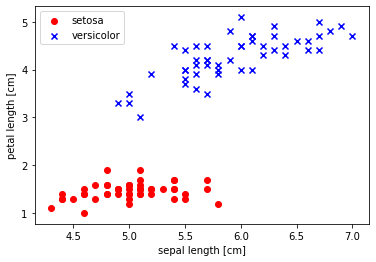

In [100]:
#(i):
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [101]:
#(ii):
weights = exactAdaline(X,y)
print('weights: ', weights)

weights:  [-0.70498922 -0.27494856  0.7719192 ]


In [102]:
#(iii):
#Let's take point 2.21 in our dataset to show the calculations prove that 
#it is misclassified by the optimal adaline.
pt = 2.21
w0 = -0.705
w1 = -0.275
w2 = 0.77

misclassified = w0 + w1 + w2*pt
print(misclassified)

0.7217


As we can see the point 2.21 from our data that we got was misclassified by the optimal adaline weights that we computed in the previous code. 

## Question 3. Practice with logistic regression

Let's first load the textbook's implementation of logistic regression with gradient descent.

In [103]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, started_weight = [], random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Below you can see the first 3 data points of the data set, all labeled as 'setosa'. Let's set the numerical value for 'setosa' to 1. (i.e. y = 1). 

In [104]:
X[0:3]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3]])


Suppose the initial weights of the logistic neuron are w0=0.1, w1=-0.2, w2=0.1

(i) Write the weights after processing data points 0,1,2, with $\eta=0.1$ and show your calculations. (This is similar to the previous assignment, only done now for the logistic neuron) <br>



(ii) Using *LogisticRegressionGD* check if the data set you constructed in Question 2, also force logistic regression to fail. You can experiment with the number of iterations and the learning rate $\eta$. 

(iii) (optional) If logistic regression does not fail for your data set, can you construct another (linearly separable) data set which causes it to fail?

*(Please insert cells below for your answers. Clearly id the part of the question you answer)*

In [105]:
#Setting the numerical value for 'setosa' to 1 (this is were y = 1)
X_sample = X[0:3]
y_sample = np.ones([1,3]).reshape(X_sample.shape[0],1)
np.hstack((y_sample,X_sample))

array([[1. , 5.1, 1.4],
       [1. , 4.9, 1.4],
       [1. , 4.7, 1.3]])

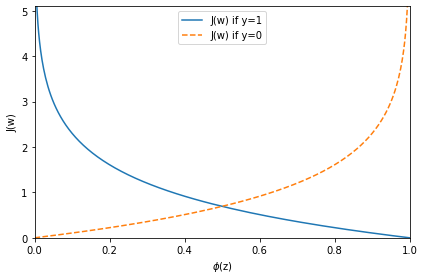

Z1:  0.4805098804887542
Z2:  0.48150843754629646
Z3:  0.48225745272227183


In [79]:
#(i):
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1 - sigmoid(z))

w0 = 0.1
w1 = -0.2
w2 = 0.1
eta = 0.1

z1 = eta * (1*w0 + 5.1*w1 + 1.4*w2)
z2 = eta * (1*w0 + 4.9*w1 + 1.4*w2)
z3 = eta * (1*w0 + 4.7*w1 + 1.3*w2)

Z1 = sigmoid(z1)
Z2 = sigmoid(z2)
Z3 = sigmoid(z3)

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_04.png', dpi=300)
plt.show()

print('Z1: ', Z1)
print('Z2: ', Z2)
print('Z3: ', Z3)

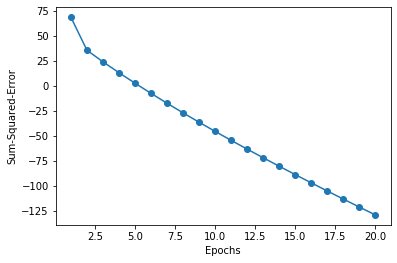

In [106]:
#(ii):
lr = LogisticRegressionGD(eta=0.001, n_iter=20, random_state=1)

lr.fit(X, y)

plt.plot(range(1, len(lr.cost_) + 1), lr.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared-Error')

plt.show()